In [2]:
import numpy as np
import matplotlib.pyplot as plt
import neurenorm
from scipy.stats import describe
from scipy.optimize import curve_fit

In [3]:
data = neurenorm.load_data("data.tif")
describe(data)

DescribeResult(nobs=891, minmax=(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), array([2.9760656, 2.9695709, 3.12441  , ..., 8.391808 , 7.4199953,
       6.328291 ], dtype=float32)), mean=array([0.02776957, 0.03470403, 0.04090406, ..., 0.04250504, 0.04154497,
       0.0383543 ], dtype=float32), variance=array([0.0472905 , 0.05566812, 0.06861086, ..., 0.15787172, 0.13444123,
       0.10552671], dtype=float32), skewness=array([10.174364 ,  8.6354065,  8.0026655, ..., 14.484041 , 13.392559 ,
       12.515666 ], dtype=float32), kurtosis=array([117.57337,  83.77758,  70.72474, ..., 254.78656, 220.77373,
       193.77261], dtype=float32))

In [4]:
data_rand = neurenorm.normalize_data(
    neurenorm.generate_random_filtered_data(len(data[0]), clip_to=0.9722, num_neurons=len(data)))

In [5]:
rdata = neurenorm.perform_renormalization(data_rand, times=8)

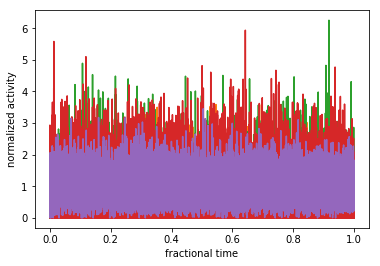

In [6]:
x = np.linspace(0, 1, len(data[0]))

for subdata in rdata[::2]:
    plt.plot(x, subdata[0])
    
plt.xlabel('fractional time')
plt.ylabel('normalized activity')
plt.show()

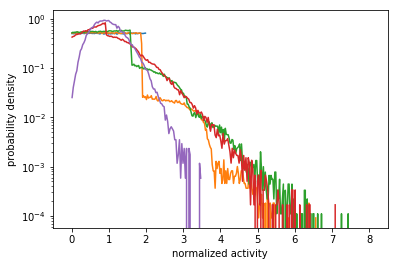

In [7]:
for subdata in rdata[::2]:
    x, y = neurenorm.make_histogram(subdata)
    plt.yscale('log')
    plt.xlim(-0.5,8.5)
    plt.plot(x, y)
plt.ylabel('probability density')
plt.xlabel('normalized activity')
plt.show()

In [8]:
p_zero, p_errs, cluster_sizes = neurenorm.compute_p_trajectory(rdata)

def neg_log(data):
    return -np.log(data)

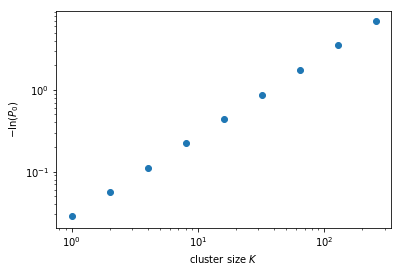

In [9]:
errs = neg_log(p_zero + p_errs / 2) - neg_log(p_zero - p_errs / 2)
plt.errorbar(cluster_sizes, neg_log(p_zero), yerr=errs, fmt='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('cluster size $K$')
plt.ylabel('$-\ln(P_0)$')
plt.show()

In [35]:
# Fitting the exponents to the P_0 curve

f = lambda x, beta, a: a * np.power(x, beta)

curve_fit(f, cluster_sizes, neg_log(p_zero))

(array([0.99145448, 0.02815307]), array([[ 8.54160669e-07, -1.27702166e-07],
        [-1.27702166e-07,  1.92395870e-08]]))